In [1]:
import fitsio
import lusee
import healpy as hp
import matplotlib
font = {'size'   : 22}
matplotlib.rc('font', **font)
import os


In [2]:
sky = lusee.sky.FitsSky(os.environ['LUSEE_DRIVE_DIR']+"/Simulations/SkyModels/ULSA_32_ddi_smooth.fits",lmax=1)
skymeans = sky.maps.mean(axis=1)
freq = sky.freq

In [3]:
import astropy.units as u
T_NB= lusee.monosky.T_NB(freq)
T_C= lusee.monosky.T_C(freq)
TskyApprox = lusee.monosky.T_J

[]

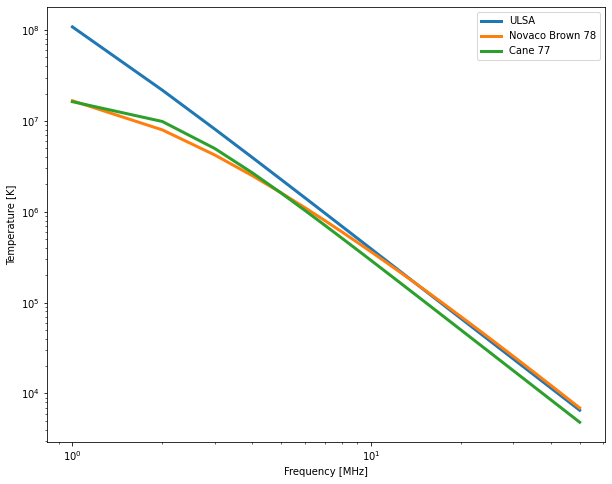

In [4]:
plt.figure(figsize=(10,8))
plt.plot(freq,skymeans,label='ULSA',lw=3)
plt.plot(freq,T_NB,label="Novaco Brown 78",lw=3)
plt.plot(freq,T_C,label="Cane 77",lw=3)
plt.plot()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.legend()
plt.loglog()

In [12]:
data_lbl = lusee.LData('../simulation/output/hfss_lbl_1m_0523.fits')
data_bnl = lusee.LData('../simulation/output/feko_bnl_1m_0523.fits')
data_lbl2 = lusee.LData('../simulation/output/hfss_lbl_1m_0523.2port.fits')
data_bnl2 = lusee.LData('../simulation/output/feko_bnl_1m_0523.2port.fits')

data_lbl[:,'13I',:]==data_lbl[:,'02I',:]
data_bnl.data.shape
data_lbl[:,'02I',:]

array([[-1.00134321e+04,  2.83077214e+01, -2.09181221e+02, ...,
         1.42359946e+02,  1.37326761e+02,  1.31065024e+02],
       [-9.74503466e+03,  3.58802026e+03,  1.68869903e+03, ...,
         8.46097377e-01,  5.10913546e+00,  5.47777346e+00],
       [-9.97021227e+03,  4.62217262e+03,  3.24957068e+03, ...,
        -4.92589813e+01, -4.24698936e+01, -3.87348373e+01],
       ...,
       [ 5.57407823e+03, -9.39292315e+03, -1.04307339e+04, ...,
         2.91073490e+02,  2.71139602e+02,  2.50908171e+02],
       [-6.52134493e+03, -6.30335461e+03, -5.92378580e+03, ...,
         3.15353187e+02,  2.94626197e+02,  2.77486714e+02],
       [-1.00849197e+04, -1.84620174e+03, -1.21292277e+03, ...,
         1.98473709e+02,  1.89159182e+02,  1.80119769e+02]])

Text(0, 0.5, '$V_{ij}\\ [K]$')

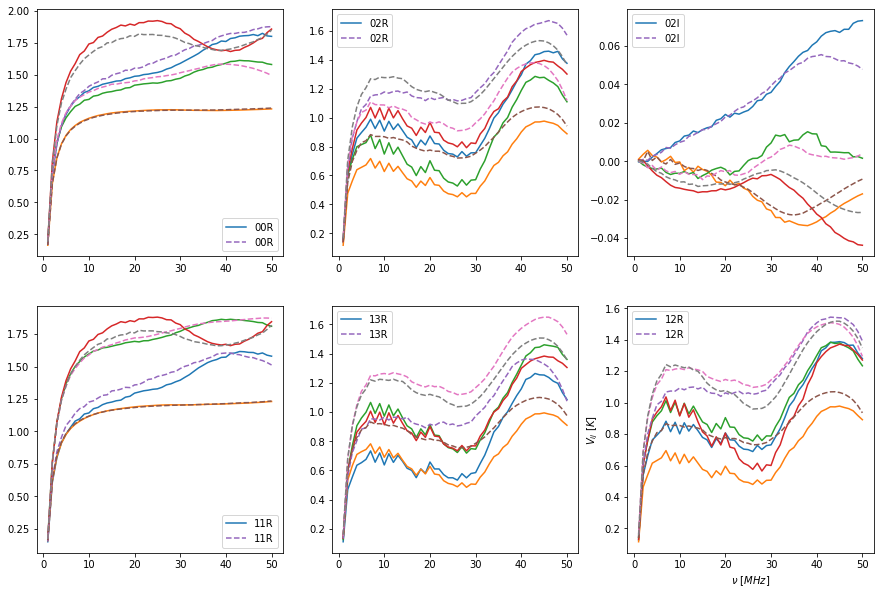

In [13]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2 ,3,figsize=(15,10))
we = (freq/10)**2.5/1e5
axl = [ax1,ax2,ax3,ax4,ax5,ax6]

for ii,comb in enumerate(['00R','02R','02I','11R','13R','12R']):
    for daydata,clr in [(data_lbl,'-'), (data_bnl,'--')]:
        xa = lambda x: x
        for day in np.arange(0,28,7):
            axl[ii].plot(freq,daydata[day,comb,:]*we,  clr,label = xa(comb))
            xa = lambda x: None
[ax.legend() for ax in axl]
plt.xlabel('$\\nu\ [MHz]$')
plt.ylabel('$V_{ij}\ [K]$')
#plt.semilogy()

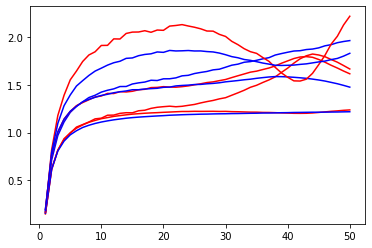

In [39]:
data1=data_bnl
data2=data_bnl2
for day in np.arange(0,28,7):
    plt.plot(freq,data2[day,'00R',:]*we,'r-',label = '2port')
    NN = data1[day,'00R',:]
    SS = data1[day,'22R',:]
    NS = data1[day,'02R',:]
    plt.plot(freq,((NN+SS-0*NS)/2)*we,'b-',label = '1port')
    